<a href="https://colab.research.google.com/github/Shivamthakur7500/AQI-prediction-project/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv('/content/air quality data.csv')

In [7]:
print(df.shape)


(24146, 16)


**Data cleaning**

In [8]:
print(df.isnull().sum())
df.duplicated().sum()

City              0
Date              0
PM2.5          3887
PM10           9233
NO             2874
NO2            2832
NOx            3750
NH3            8372
CO             1683
SO2            3156
O3             3270
Benzene        4041
Toluene        5940
Xylene        15566
AQI            3738
AQI_Bucket     3738
dtype: int64


0

In [9]:
df.shape

(24146, 16)

In [10]:
df.head(316)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,Ahmedabad,2015-11-08,127.64,NaN,6.74,31.91,38.64,NaN,6.74,26.94,47.33,9.55,20.72,4.32,355.0,Very Poor
312,Ahmedabad,2015-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,Ahmedabad,2015-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,Ahmedabad,2015-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,3887
PM10,9233
NO,2874
NO2,2832
NOx,3750
NH3,8372
CO,1683
SO2,3156


In [12]:
 # Remove rows where all values are NaN (excluding 'City' and 'Date' columns)
df_cleaned = df.dropna(how='all', subset=df.columns[2:])

# Fill missing values with column-wise mean (excluding non-numeric columns)
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].mean())

# Display the cleaned data
df_cleaned.head(250)
print('data is:',numeric_cols)
df=df_cleaned

data is: Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')


<ipython-input-12-696dd61d59c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].mean())


In [13]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [14]:
tot=df['AQI_Bucket'].count()
tot

20408

In [15]:
null_val=df['AQI_Bucket'].isnull().sum()
null_val

2694

In [16]:
print((null_val/tot)*100)

13.200705605644844


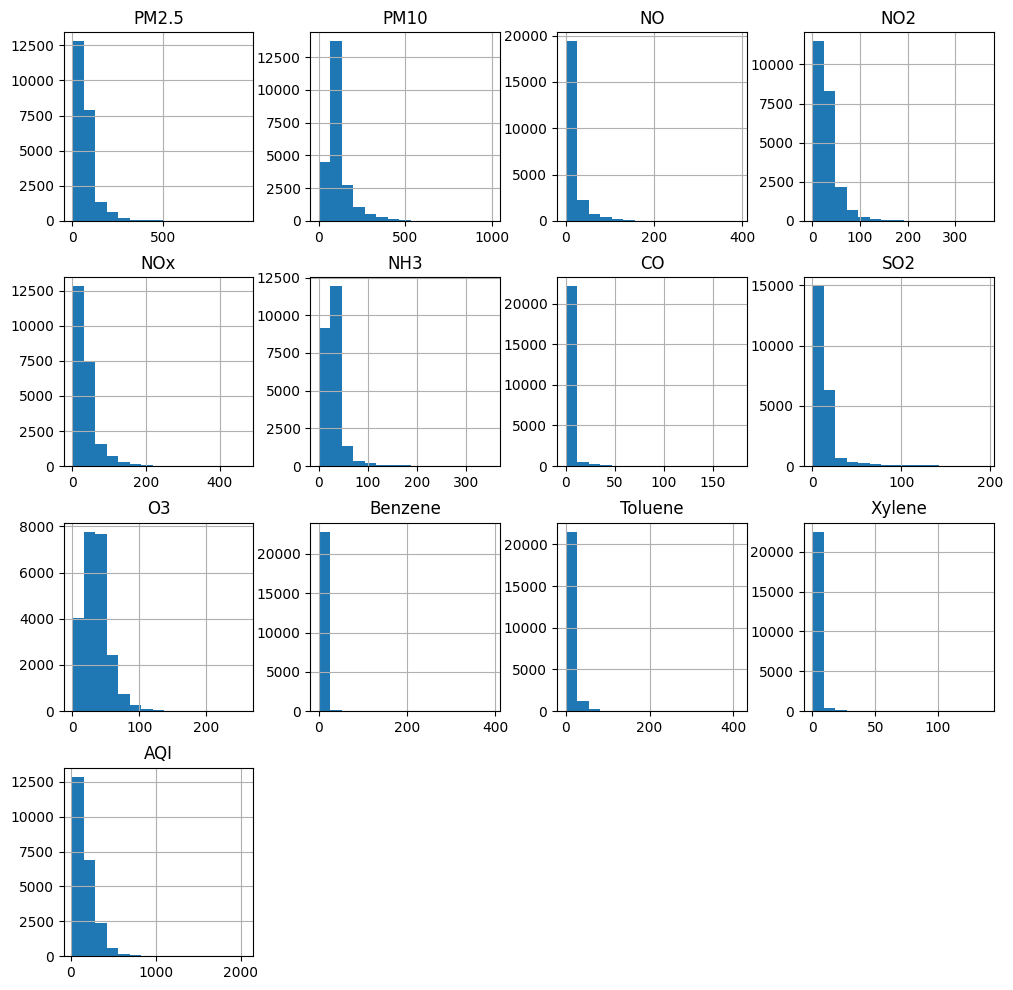

In [17]:
df.hist(figsize=(12, 12), bins=15)
plt.show()

##Bivariate Analysis

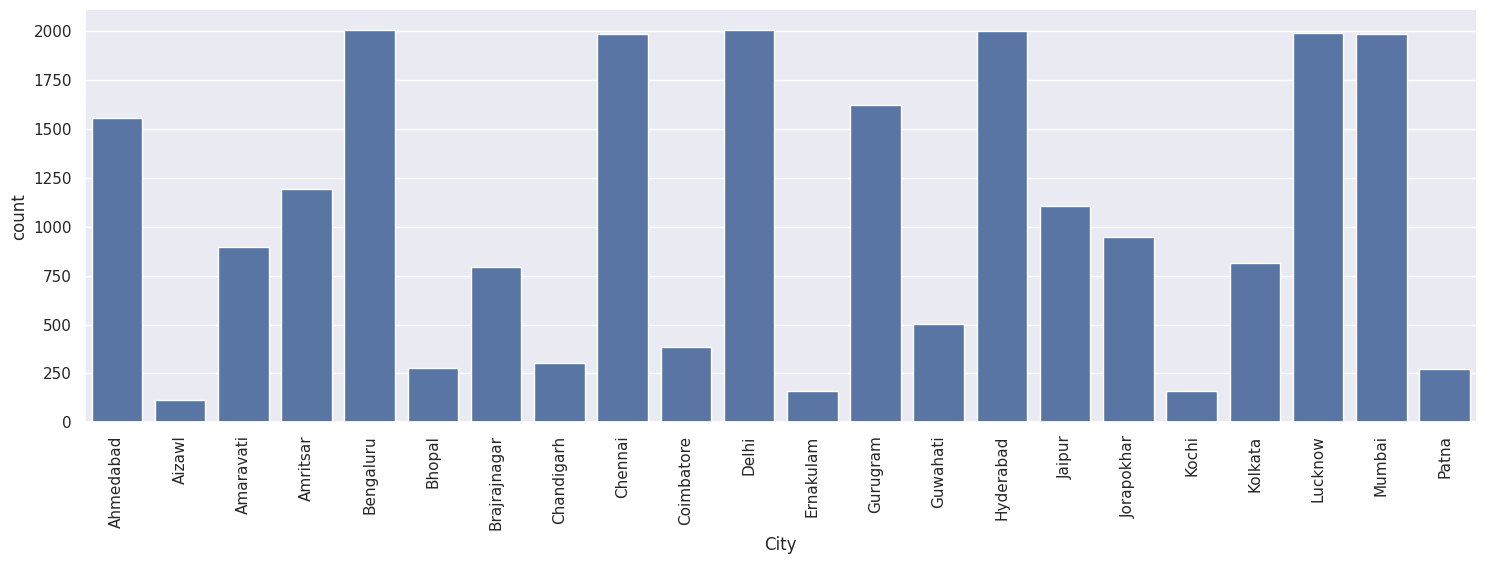

In [18]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City",kind='count',data=df,height=5,aspect=3) #catplot means categorical plot
graph.set_xticklabels(rotation=90) #the names on x axis
plt.show()

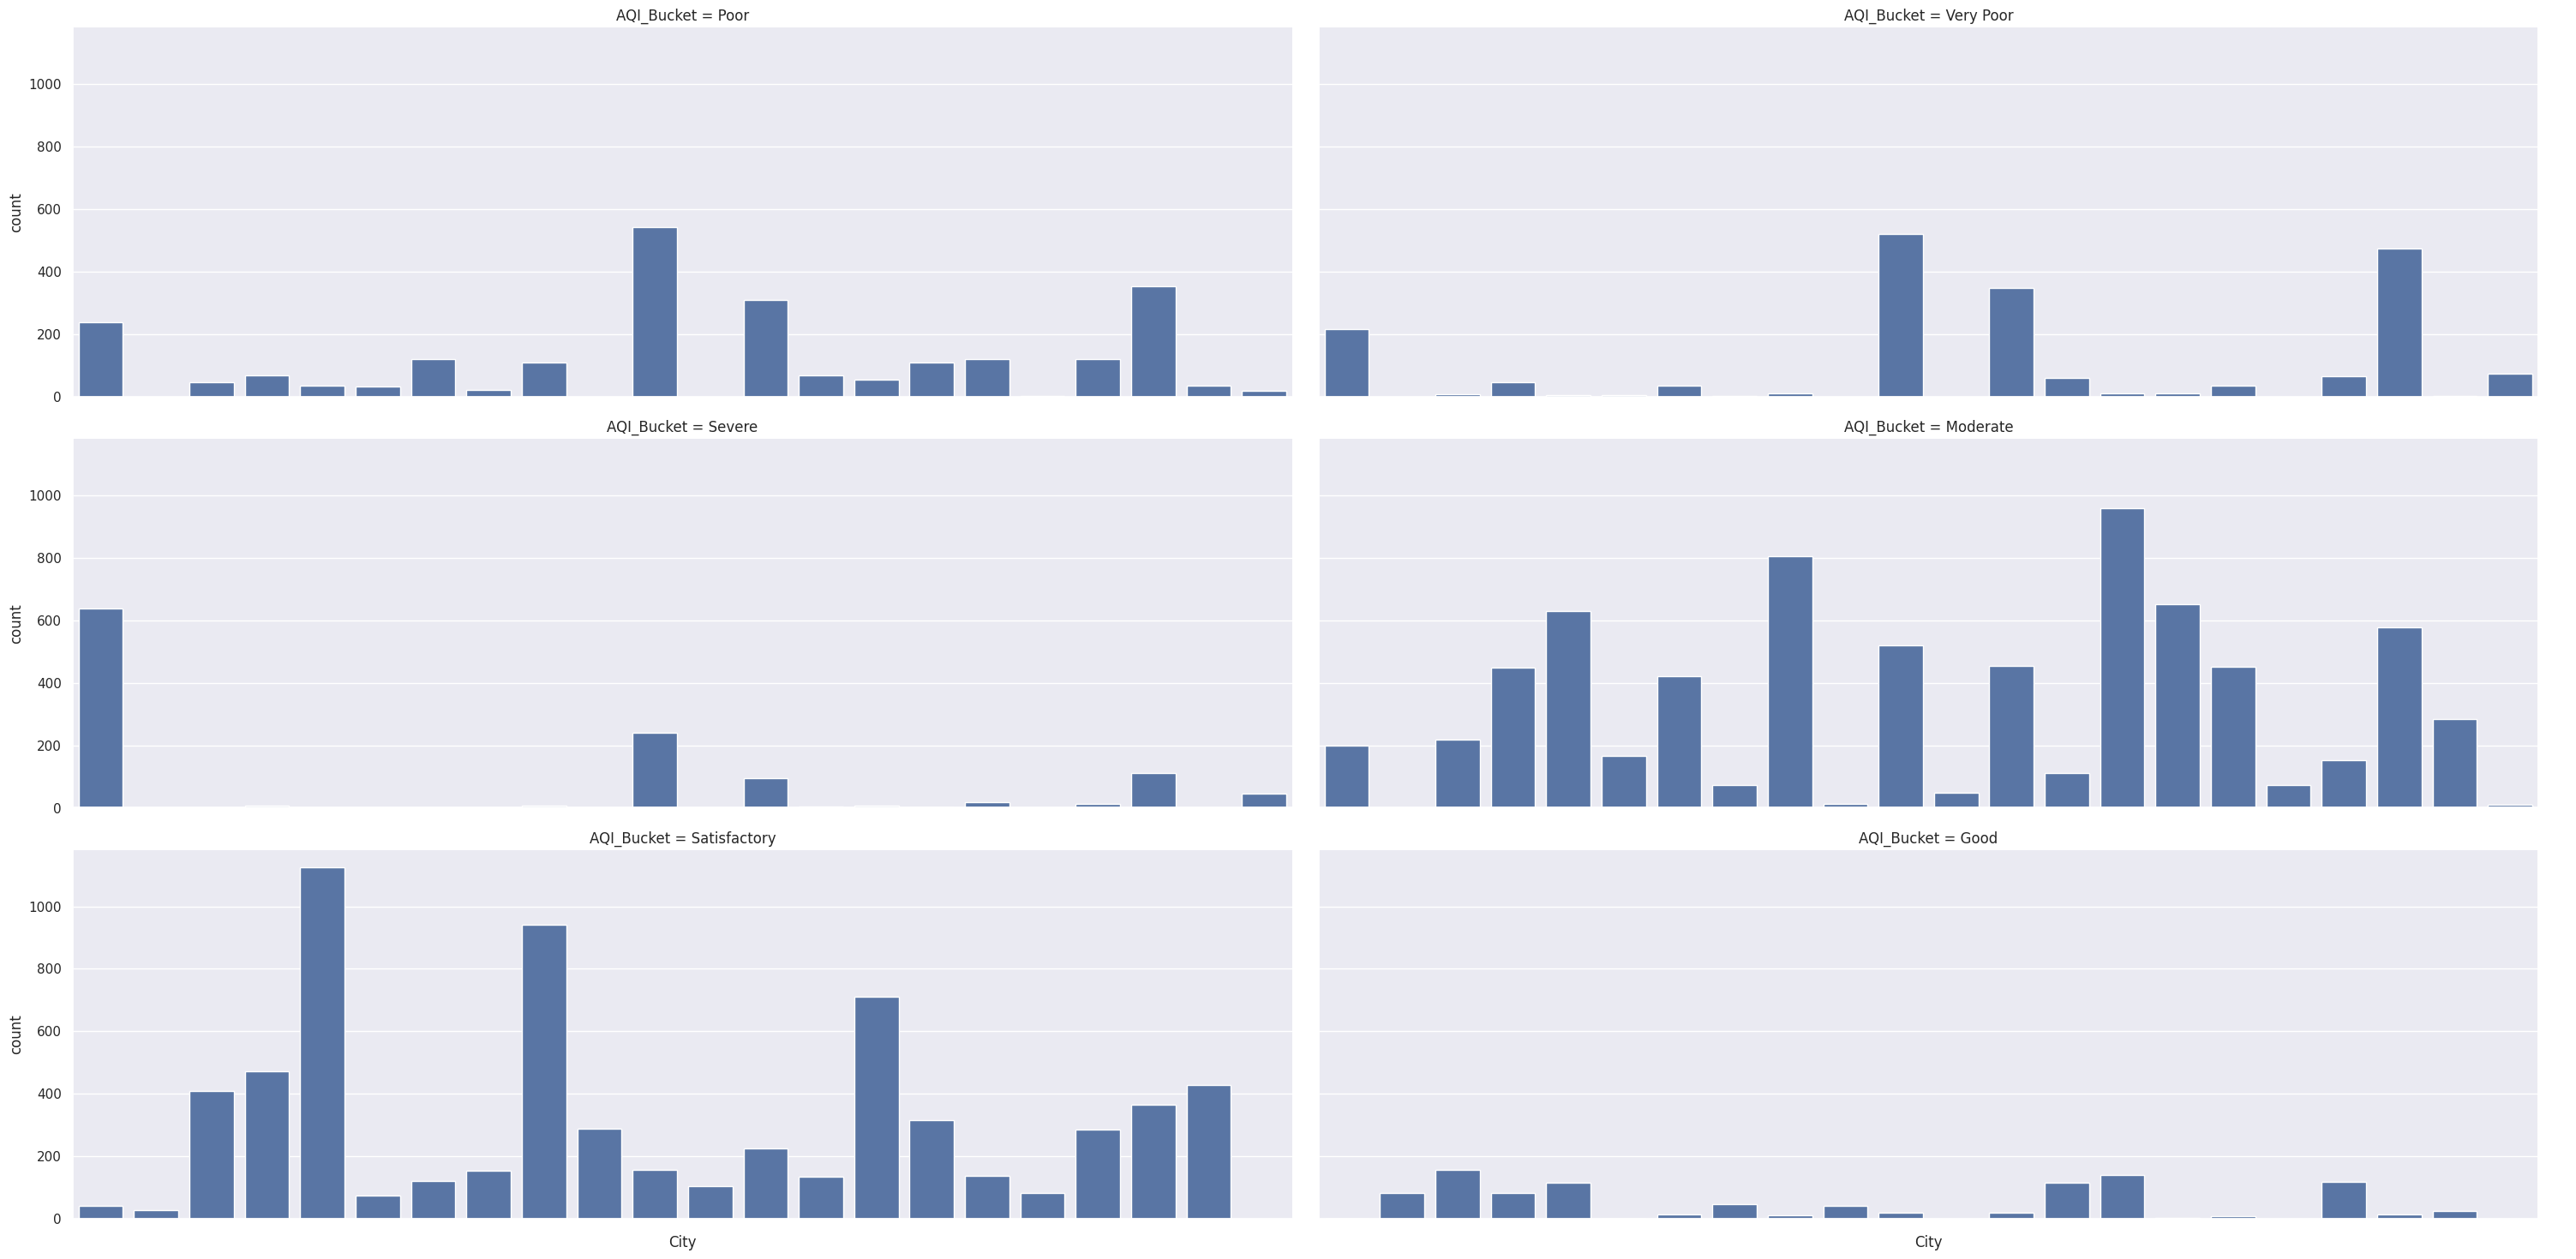

In [19]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City",kind='count',col="AQI_Bucket",col_wrap=2,data=df,height=5,aspect=3) #catplot means categorical plot
graph.set_xticklabels(rotation=90) #the names on x axis
plt.show()


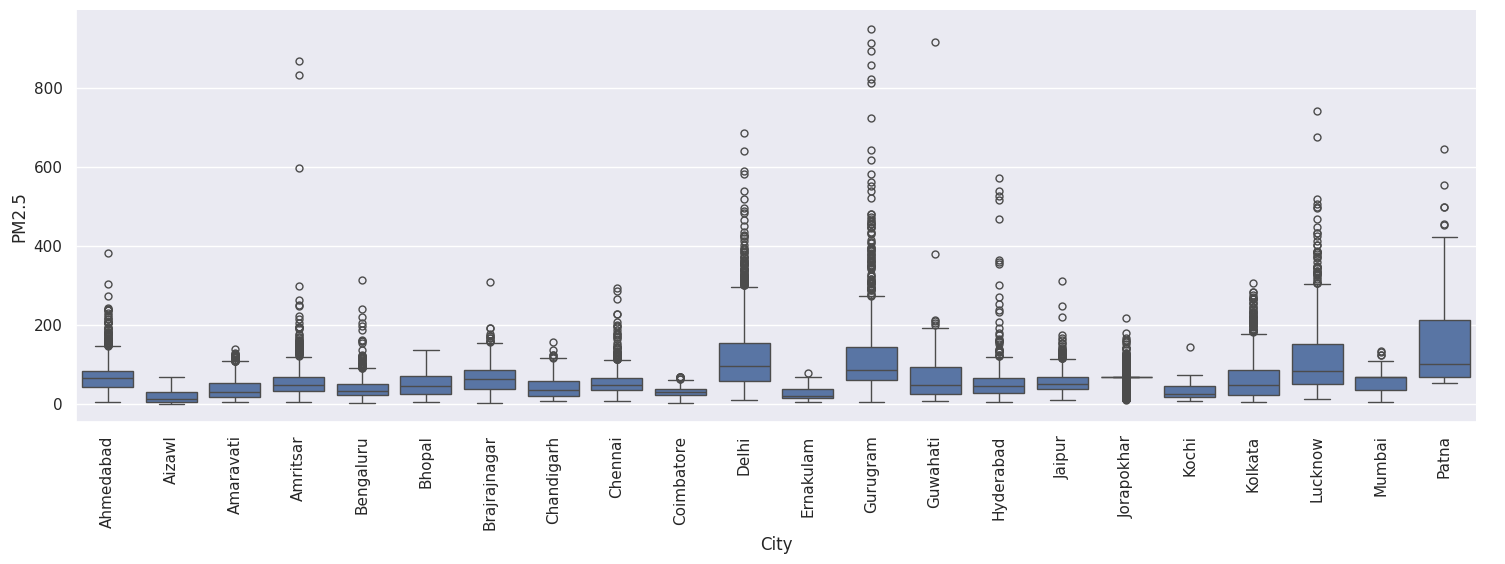

In [20]:
graph1 = sns.catplot(x='City',y='PM2.5',data=df,kind='box',height=5,aspect=3)
graph1.set_xticklabels(rotation=90)
plt.show()

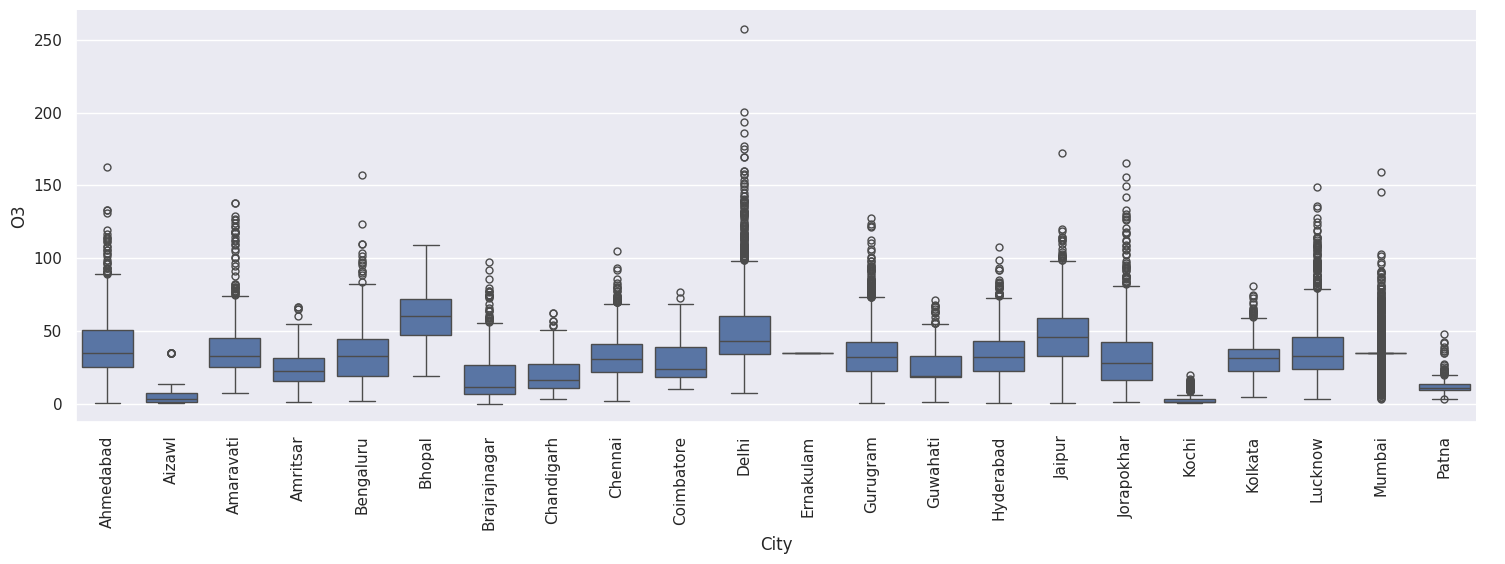

In [21]:
graph2 = sns.catplot(x='City',y='O3',data=df,kind='box',height=5,aspect=3)
graph2.set_xticklabels(rotation=90)
plt.show()


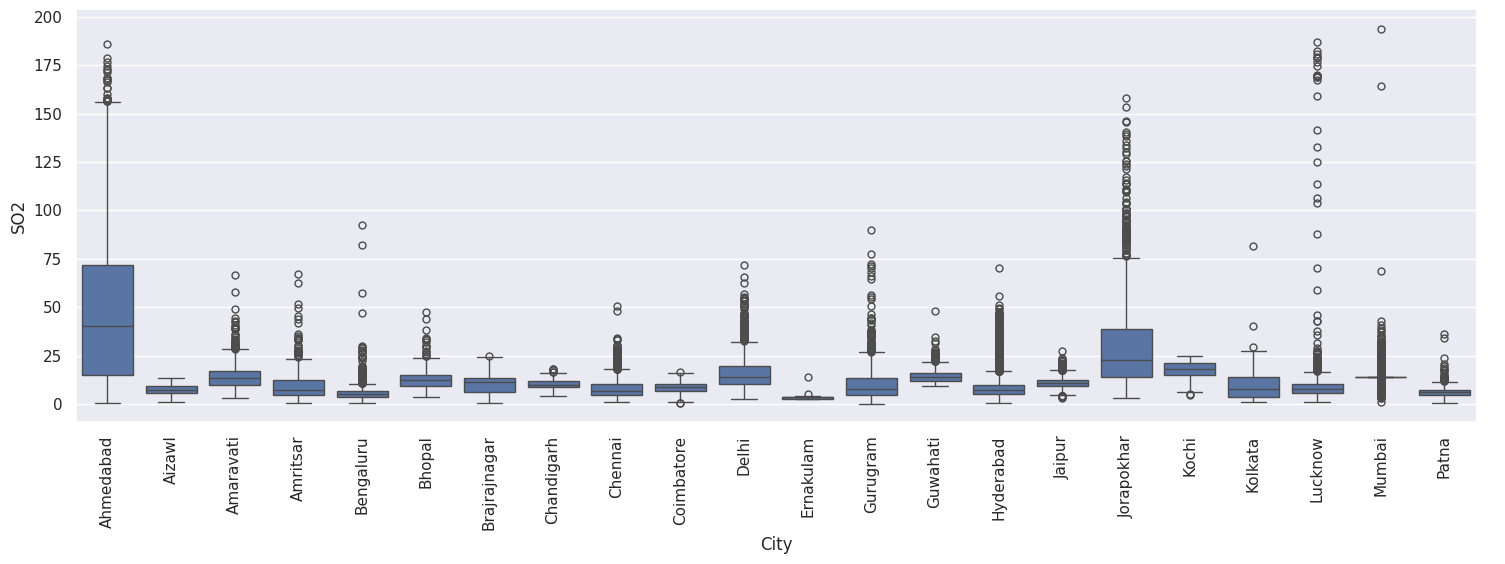

In [22]:

graph4 = sns.catplot(x='City',y='SO2',data=df,kind='box',height=5,aspect=3)
graph4.set_xticklabels(rotation=90)
plt.show()

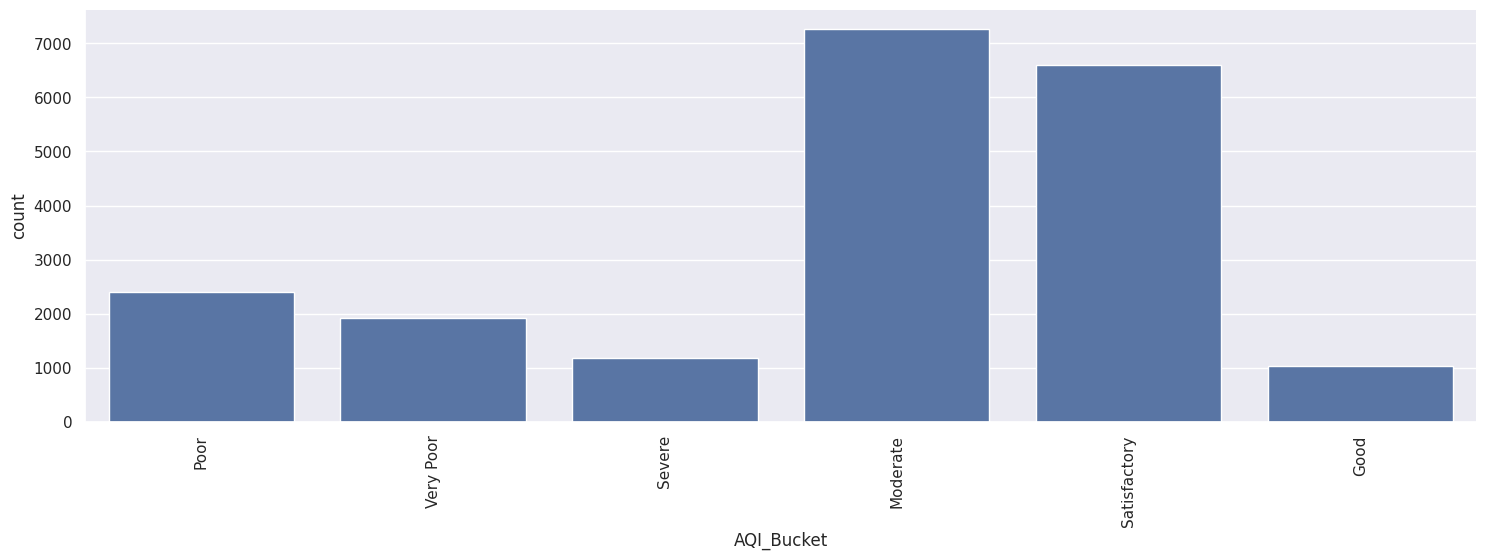

In [23]:

graph5 = sns.catplot(x='AQI_Bucket',data=df,kind='count',height=5,aspect=3)
graph5.set_xticklabels(rotation=90)
plt.show()

In [24]:
df.isnull().sum().sort_values(ascending=False)

,0
AQI_Bucket,2694
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0


<Axes: >

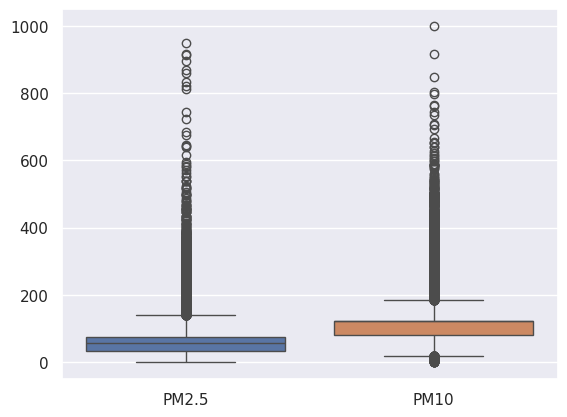

In [25]:
 sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

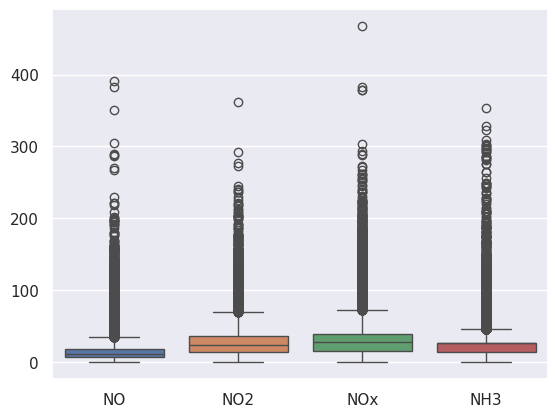

In [26]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

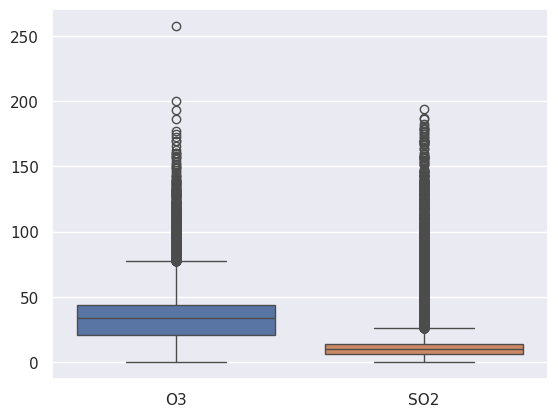

In [27]:
sns.boxplot(data=df[['O3', 'SO2']])

In [28]:
# IQR Method - Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x > ub else x)
        )
    return df

In [29]:
df = replace_outliers(df)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,23102.0,55.803805,27.941500,0.16,32.730000,56.870000,75.450000,139.53
PM10,23102.0,105.505917,34.919236,18.82,81.033125,122.561411,122.561411,184.84
NO,23102.0,12.243902,7.348656,0.02,6.310000,10.730000,17.800000,35.03
NO2,23102.0,25.708243,14.803963,0.01,13.280000,24.300000,35.960000,69.96
NOx,23102.0,27.497660,15.425635,0.00,15.500000,27.500000,38.286875,72.48
NH3,23102.0,21.981114,9.487736,0.01,13.952500,26.591953,26.591953,45.55
CO,23102.0,0.985822,0.671945,0.00,0.500000,0.890000,1.520000,3.05
SO2,23102.0,10.246379,5.141079,0.21,5.980000,9.890000,14.009233,26.05
O3,23102.0,32.772472,15.784635,0.01,20.940000,33.740000,43.415625,77.12
Benzene,23102.0,1.771979,1.620058,0.00,0.220000,1.480000,2.963002,7.07


<Axes: >

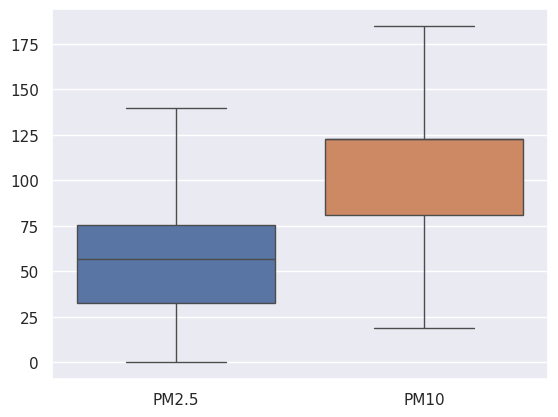

In [31]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

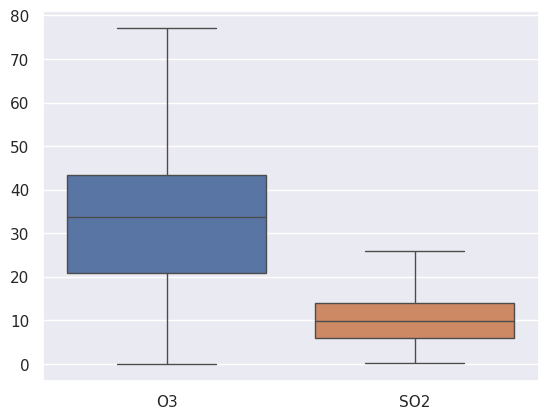

In [32]:
sns.boxplot(data=df[['O3', 'SO2']])

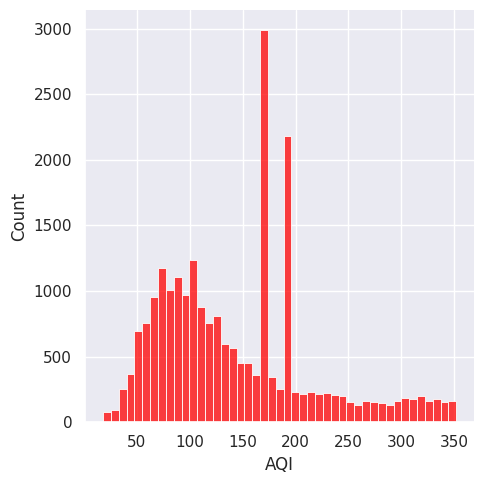

In [33]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [34]:
df1 = df.drop(columns=['City'])

##Multivariate Analysis

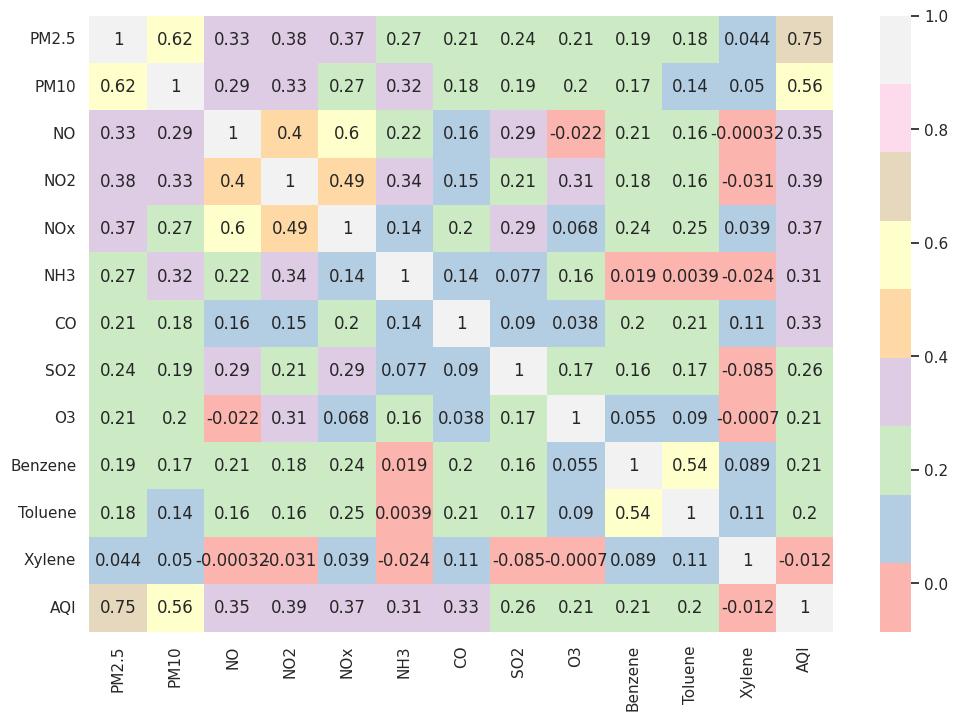

In [35]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df1.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='Pastel1')
plt.show()

In [36]:
df.drop(['Date', 'City'], axis = 1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,68.303614,122.561411,0.92,18.22,17.15,26.591953,0.92,14.009233,43.4175,0.00,0.020000,1.940000,170.921011,NaN
1,68.303614,122.561411,0.97,15.69,16.46,26.591953,0.97,24.550000,34.0600,3.68,5.500000,2.596112,170.921011,NaN
2,68.303614,122.561411,17.40,19.30,29.70,26.591953,1.52,14.009233,30.7000,6.80,16.400000,2.250000,170.921011,NaN
3,68.303614,122.561411,1.70,18.48,17.97,26.591953,1.70,18.590000,36.0800,4.43,10.140000,1.000000,170.921011,NaN
4,68.303614,122.561411,22.10,21.42,37.76,26.591953,1.52,14.009233,39.3100,7.01,8.096887,2.780000,170.921011,NaN


In [48]:

# Check if 'AQI_Bucket' exists before attempting to drop it.
if 'AQI_Bucket' in df.columns:
    df.drop('AQI_Bucket', axis=1, inplace=True)
else:
    print("Column 'AQI_Bucket' not found in DataFrame.")
df.head()

Column 'AQI_Bucket' not found in DataFrame.


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,68.303614,122.561411,0.92,18.22,17.15,26.591953,0.92,14.009233,43.4175,0.00,0.020000,1.940000,170.921011
1,68.303614,122.561411,0.97,15.69,16.46,26.591953,0.97,24.550000,34.0600,3.68,5.500000,2.596112,170.921011
2,68.303614,122.561411,17.40,19.30,29.70,26.591953,1.52,14.009233,30.7000,6.80,16.400000,2.250000,170.921011
3,68.303614,122.561411,1.70,18.48,17.97,26.591953,1.70,18.590000,36.0800,4.43,10.140000,1.000000,170.921011
4,68.303614,122.561411,22.10,21.42,37.76,26.591953,1.52,14.009233,39.3100,7.01,8.096887,2.780000,170.921011


In [49]:
# Scaling - Standard Scaler
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)
df1

array([[ 0.4473661 ,  0.48843747, -1.5409821 , ..., -1.23456334,
        -1.25794882,  0.3530115 ],
       [ 0.4473661 ,  0.48843747, -1.53417799, ...,  0.12235912,
         0.52686678,  0.3530115 ],
       [ 0.4473661 ,  0.48843747,  0.70165349, ...,  2.82134724,
        -0.41465845,  0.3530115 ],
       ...,
       [ 0.70313406,  0.48843747,  0.75608639, ..., -0.92999863,
        -1.25794882,  0.65772254],
       [ 1.38385671,  0.48843747,  2.9034644 , ..., -1.02656793,
        -1.25794882,  0.89233871],
       [-0.1468745 ,  0.48843747,  0.72744873, ...,  0.76538357,
         0.52686678,  0.3530115 ]])

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [52]:
# Feature & Target Selection
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [53]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,68.303614,122.561411,0.92,18.22,17.15,26.591953,0.92,14.009233,43.4175,0.00,0.020000,1.940000
1,68.303614,122.561411,0.97,15.69,16.46,26.591953,0.97,24.550000,34.0600,3.68,5.500000,2.596112
2,68.303614,122.561411,17.40,19.30,29.70,26.591953,1.52,14.009233,30.7000,6.80,16.400000,2.250000
3,68.303614,122.561411,1.70,18.48,17.97,26.591953,1.70,18.590000,36.0800,4.43,10.140000,1.000000
4,68.303614,122.561411,22.10,21.42,37.76,26.591953,1.52,14.009233,39.3100,7.01,8.096887,2.780000


In [54]:
# Split the data into training and testing data - Training set - 80% | Testing set - 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X Train',X_train.shape)
print('Shape of X Test',X_test.shape)
print('Shape of y Train',y_train.shape)
print('Shape of y Test',y_test.shape)

Shape of X Train (18481, 12)
Shape of X Test (4621, 12)
Shape of y Train (18481,)
Shape of y Test (4621,)


In [55]:
# Linear Regression Model
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predicting the values:
train_pred = LR.predict(X_train) # Predicting train
test_pred = LR.predict(X_test) # Predicting test

In [57]:
# Evaluation for Linear Regression
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', LR.score(X_train, y_train))
print('R Squared value on Test = ', LR.score(X_test, y_test))

RMSE Train Data =  44.53907661456656
RMSE Test Data =  44.35735119675435
____________________________________________________________
R Squared value for Train =  0.6215036748076476
R Squared value on Test =  0.6277614078472337


In [58]:
# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [59]:
# Predicting the values:
train_pred = knn.predict(X_train) # Predicting train
test_pred = knn.predict(X_test) # Predicting test

# Evaluation for KNN
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', knn.score(X_train, y_train))
print('R Squared value on Test = ', knn.score(X_test, y_test))

RMSE Train Data =  32.758678250480074
RMSE Test Data =  39.569569973701064
____________________________________________________________
R Squared value for Train =  0.7952461906626356
R Squared value on Test =  0.7037810423084401


In [60]:
# Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
# Predicting the values:
train_pred = dtr.predict(X_train) # Predicting train
test_pred = dtr.predict(X_test) # Predicting test

# Evaluation for Decision Tree Regressor
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', dtr.score(X_train, y_train))
print('R Squared value on Test = ', dtr.score(X_test, y_test))

RMSE Train Data =  2.582825195940507
RMSE Test Data =  47.539329775033295
____________________________________________________________
R Squared value for Train =  0.9987271732965086
R Squared value on Test =  0.5724407588798203


In [62]:
# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
# Predicting the values:
train_pred = rfr.predict(X_train) # Predicting train
test_pred = rfr.predict(X_test) # Predicting test

# Evaluation for Randome Forest Regressor
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', rfr.score(X_train, y_train))
print('R Squared value on Test = ', rfr.score(X_test, y_test))

RMSE Train Data =  12.598975666277592
RMSE Test Data =  33.666929370681416
____________________________________________________________
R Squared value for Train =  0.9697134556634363
R Squared value on Test =  0.7855642435990866
